In [1]:
%matplotlib notebook

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib2tikz import save as tikz_save
import os

In [3]:
   #own modules
import IO
import STAT_wrap
import lib_mon_points as mp
import tools
import lib_hipstar as lh
import lines

In [4]:
cd ~/drive2/HPT/INLET_TURB_ONLY/

/media/drive2/HPT/INLET_TURB_ONLY


In [5]:
post_folder=os.getcwd()

In [6]:
steps=os.walk('.').next()[1]
nsteps=len(steps)
step_labels=[]
for j in steps:
    step_labels.append(j.replace('_','-'))
print steps

['37_16dom', '35_32dom', '36_32dom_2upp', '41_80dom', '40_40dom', '38_16_dom_upp']


In [7]:
streamwise=lines.lines()
infile=lh.infile('/inlet_turb_new_mon.in')
i_st=1
i_end=infile.nxp[0]
j_st=infile.nyp[0]/2
j_end=infile.nyp[0]/2
k=0
for i in steps:
    print 'working on ' + i
    streamwise.extr_ijdata(1,ibeg=i_st,iend=i_end,jbeg=j_st,jend=j_end,
                    label=step_labels[k],verbose=False,filename=i+'/STAT_cont.bin',force_read=True,save='Overwrite')
    print streamwise.label[k]
    k+=1

working on 30000_to_50000
30000-to-50000


<IPython.core.display.Javascript object>


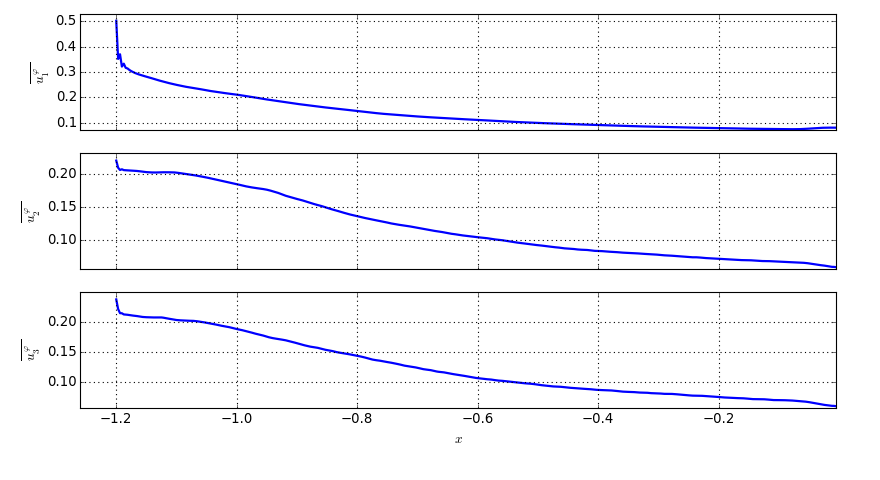

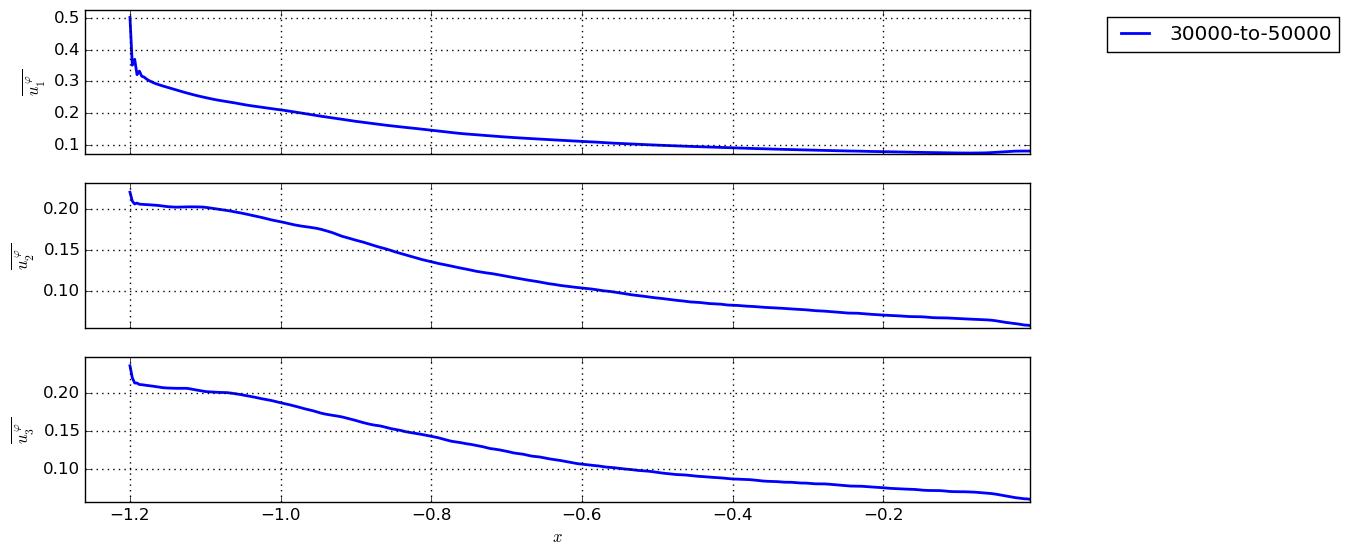

In [8]:
ind_y=[streamwise.l[0].var.get_index(102,5),streamwise.l[0].var.get_index(102,6),streamwise.l[0].var.get_index(102,8)]
streamwise.plot_var(0,ind_y,xlabel=None,ylabel=None,Xmin=None,Xmax=None,Ymin=None,Ymax=None,
                        linewidth=2,xfac=[0.95,1.05],yfac=[0.95,1.05],figsize=[11,6],
                        disp_shared_ax=False,hide_shared_ticks=True,grid=True,
                        legend='outside',marker=False,fig_handle=None,fig_num=-5,logx=False,logy=False,scale='no',
                        collapse_subplots=False,var_leg_loc=2,data_leg_loc=1,var_mark=None,
                        show_data_leg=True,ref_data=None)

<IPython.core.display.Javascript object>


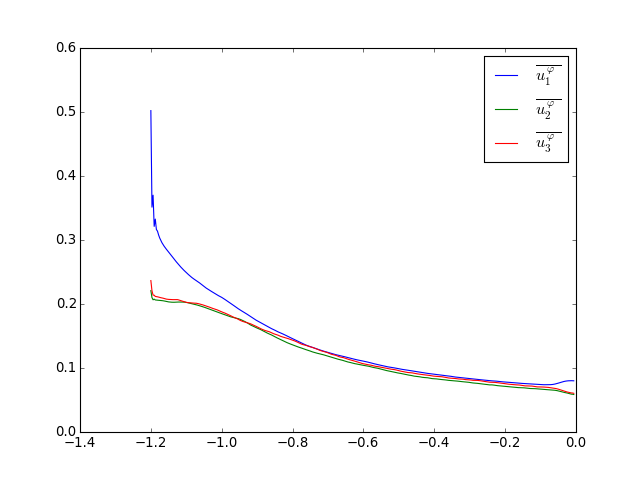

In [9]:
plt.figure()
for i in ind_y:
    plt.plot(streamwise.l[0].data[:,0],streamwise.l[0].data[:,i],label=streamwise.l[0].var.vars[i])
plt.legend(loc=0)